In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [83]:
from scipy.stats import binom_test

In [100]:
df2=pd.read_csv("IAR-Enbrel-Color-pvalue-Nov13.csv",index_col=False)

In [85]:
df=pd.read_csv("Enbrel_2018_Q2_Q3_ASBIRAData.csv",index_col=False)

In [3]:
df_csv=pd.read_csv("IAR.csv")

In [86]:
import scipy.stats as stats

In [87]:
import math

contingency table:
[[invalid count, expected invalid count],
 [valid count,  expected valid count]]
OR=(expected Odd)/(observed odd)
Odd=valid count/invalid count

Inf OR: the expected invalid count=0( <1)
Nan OR: the observed invalid count=0 (Inf on the denominator of OR)

Rounding?



In [114]:
df2.columns

Index(['APR\nProduct', 'Platform', 'Met_Num', 'Site', 'Link to P Chart',
       'N Total', 'N Invld', 'Mean\nInvalid\nRate', 'Pltfrm\nTarget\nInv Rate',
       'Last Obs\n> UCL?', 'APR Year', 'Assay\nTotal', 'Assay\nValid',
       'Assay\nInvalid', 'Assay\nInvalid\nRate', 'Assay\nAA', 'Assay\nSS',
       'Assay\nEF', 'Assay\nTE', 'Assay\nAbort', 'Green', 'Red', 'Color',
       'binom_pvalue', 'fishers_pvalue', 'fishers_OR'],
      dtype='object')

In [ ]:
70	19
62	9


In [129]:
stats.fisher_exact([[0, 1], [2, 3]],alternative='two-sided')

(0.0, 1.0)

In [116]:
df2[(df2['APR Year'].isin([2017,2018]))&(df2.Site=="AML")][['Platform', 'Met_Num', 'Site', 
      'APR Year', 'Assay\nTotal', 'Assay\nInvalid', 'Assay\nInvalid\nRate']].to_csv("Meetingslides.csv",index=False)

In [57]:
np.isinf(list(df["fishers_OR"])).any()

df[np.isinf(list(df["fishers_OR"]))][['Assay\nTotal','Assay\nInvalid',"Green"]]

df[df["fishers_OR"].isnull()][['Assay\nTotal','Assay\nInvalid']]

df[['Assay\nTotal','Assay\nInvalid',"fishers_pvalue"]]

,Assay Total,Assay Invalid
29,9,0
35,2,0
36,2,0
38,7,0
39,7,0
50,2,0
58,1,0
59,4,0
64,1,0
65,7,0


In [79]:
df["fishers_pvalue"]=None
df["fishers_OR"]=None
for i in range(len(df)):
    
    n=df['Assay\nTotal'].iloc[i]
    invalid_count=df['Assay\nInvalid'].iloc[i]
    target_rate=df["Red"].iloc[i]/100
    target_count=target_rate*n
    test=stats.fisher_exact([[invalid_count, target_count], [n-invalid_count, n-target_count]],alternative="greater")
    df["fishers_pvalue"].iloc[i]=test[1]
    df["fishers_OR"].iloc[i]=test[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
df['Assay\nInvalid\nRate']

0      50.0
1      62.5
2      19.0
3      26.9
4      43.8
5      32.0
6      24.3
7      25.0
8       9.1
9      22.6
10     18.6
11     28.0
12     18.0
13     25.0
14     15.5
15     27.1
16     14.5
17     13.3
18     16.5
19     10.0
20     11.5
21      6.5
22     21.5
23     21.2
24      5.1
25      8.9
26     16.7
27      0.0
28     14.9
29      0.0
       ... 
436    18.0
437     5.9
438     4.8
439     2.6
440     1.8
441     6.3
442     7.1
443     0.0
444     0.0
445     0.0
446     0.0
447     0.0
448     0.0
449     0.0
450     0.0
451     0.0
452    25.0
453    25.0
454    25.0
455     0.0
456     0.0
457     7.1
458     0.0
459     0.0
460     0.0
461     0.0
462     0.0
463     0.0
464     0.0
465    10.0
Name: Assay\nInvalid\nRate, Length: 466, dtype: float64

In [77]:
df["Color"]=None
df["Color"][df['Assay\nInvalid\nRate']>df.Red]="Red"
df["Color"][df['Assay\nInvalid\nRate']<=df.Red]="Green"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
df[['binom_pvalue', 'fishers_pvalue']]

,binom_pvalue,fishers_pvalue
0,0.0846808,0.285714
1,0.00147593,0.0839161
2,0.28783,0.355484
3,0.0437739,0.161613
4,1.83485e-05,0.00682739
5,0.0112972,0.0973327
6,0.043837,0.120829
7,0.427102,0.571429
8,0.783872,0.785714
9,0.0368876,0.105178


In [81]:
df.to_csv("IAR-Enbrel-Color-pvalue-Nov13.csv",index=False)

In [4]:
def populator(df, col_name):
    #col_name has to be a string
    non_null_series=df[col_name][~df[col_name].isnull()]
    
    for i in range(len(non_null_series)-1):
        value=list(non_null_series)[i]
        loca=list(non_null_series.index)[i]
        loca_next=list(non_null_series.index)[i+1]
        
        df[col_name].loc[loca:loca_next]=value
    
    #last one
    loca=non_null_series.index.max()
    value=non_null_series.loc[loca]
    df[col_name].loc[loca:]=value
        
    #for value, location in non_null_series.iteriems():   enumerator usage not working here
    return

In [5]:
populator(df_csv,"Site")

populator(df_csv,'APR\nProduct')
populator(df_csv, 'Platform')
populator(df_csv,'Met_Num')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df["Platform"].unique()

array(['Bioassay', 'CE', 'Chromatography', 'Endotoxin', 'Gels', 'General',
       'Immunoassay', 'Microbiology', 'PCR'], dtype=object)

action_level=pd.DataFrame(
    {
        "Platform":df_csv["Platform"].unique(),
        "Green":[10,10,7,1,8,2,10,1,2],

        "Red":[13,13,9,1.6,10,3,13,1.6,3]
    }
)
    


In [9]:
df=pd.merge(df_csv,action_level, on="Platform")


In [78]:
df["binom_pvalue"]=None
for i in range(len(df)):
    df["binom_pvalue"].iloc[i]=binom_test(\
                    x=df['Assay\nInvalid'].iloc[i],\
                    n=df['Assay\nTotal'].iloc[i],\
                        p=df["Red"].iloc[i]/100,alternative="greater")

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
df.to_csv("IAR-Enbrel-Color-pvalue-Nov8.csv",index=False)

In [ ]:
histtype : {'bar', 'barstacked', 'step', 'stepfilled'}

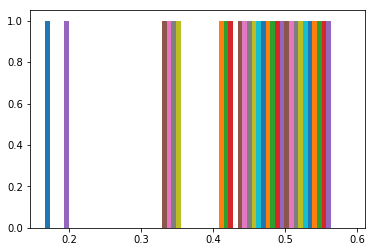

In [19]:
plt.hist(df[df.Color=="Yellow"]["binom_pvalue"],bins=2);